In this notebook we try to continue our search for variables with predictive power by subsetting the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('df_client.csv')

In [3]:
df.head()

,Country_Code,BR Code,Period,Client,risk_rating,Self_exclude_flag,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
0,0,0,2017Q2,0,7,1,581103.4591,612122.5165,589483.6484,608043.5063,...,572312.4225,601762.9316,574251.4130,577170.3096,594024.8975,616177.8226,588163.8327,623659.1015,608794.9055,574860.551
1,0,0,2016Q1,0,7,1,608189.3682,581513.6158,609292.1500,NaN,...,608263.6088,605605.1646,NaN,581951.0166,608354.2362,623470.1198,591055.8212,592011.4052,572734.0028,NaN
2,0,0,2015Q4,0,7,1,626775.4450,620338.8464,NaN,NaN,...,621396.2940,NaN,NaN,590490.3620,620329.2616,NaN,626221.0887,572241.0321,NaN,NaN
3,0,0,2015Q2,0,7,1,613152.4469,595630.8819,NaN,NaN,...,589714.2432,NaN,NaN,580633.8747,576235.2813,NaN,619098.6619,578761.7137,NaN,NaN
4,0,1,2019Q1,1,9,0,615840.2415,603501.2067,587601.9393,610071.5454,...,607400.3547,570273.9177,573434.8221,572413.5987,618435.4264,587802.7283,NaN,NaN,NaN,NaN


In [4]:
allcols = df.columns.values

In [5]:
Y0_cols = []
Y1_cols = []
Y2_cols = []
Y3_cols = []

for col in allcols[6:]:
    if col.find('Y0')>0:
        Y0_cols.append(col)
        
    if col.find('Y1')>0:
        Y1_cols.append(col)

    if col.find('Y2')>0:
        Y2_cols.append(col)

    if col.find('Y3')>0:
        Y3_cols.append(col)

In [6]:
len(Y0_cols)

30

In [7]:
df.loc[:,['Client', 'risk_rating']].drop_duplicates().groupby(by='Client').count().sort_values( \
        by = 'risk_rating', ascending=False).head(10)

,risk_rating
Client,
3144,6
5525,6
2313,6
5854,6
1299,6
1836,6
3666,6
2820,6
1562,5


Grouping the data by Client reveals that some Clients have multiple entries in the dataset

Perhaps an examination of these Clients' data will reveal variables with some predictability?

In [8]:
multi_risk_client_list = [3144, 5525, 2313, 5854, 1299, 1836, 3666, 2820, 1562, 6121]

In [9]:
f1 = df['Client'].isin(multi_risk_client_list) 
df.loc[f1,:].to_excel('Multi Risk Clients.xlsx')

In [10]:
multi_risk_clients = df.loc[f1,:]

In [12]:
multi_risk_clients.head()

,Country_Code,BR Code,Period,Client,risk_rating,Self_exclude_flag,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
3286,0,12,2020Q1,1299,12,0,607616.1084,574186.8013,625590.3037,604917.4498,...,610306.8499,580347.8385,592475.3364,624154.4451,589026.5083,572775.2736,572982.4235,615471.7180,602594.7554,592521.4856
3287,0,12,2019Q4,1299,12,0,607972.2610,575253.5949,583047.6117,608068.7021,...,606028.1089,597424.9974,588498.5901,578810.7232,595749.6948,573280.1630,610824.2963,598022.6672,573376.3825,593390.7201
3288,0,12,2019Q3,1299,11,0,619504.8227,576760.3221,578871.4739,613830.5521,...,610391.5180,593443.2578,602621.8927,581969.9786,612371.3921,627911.4983,586996.6893,605591.0608,572021.2394,600611.5660
3289,0,12,2019Q2,1299,10,0,586907.1979,600111.7406,585328.4130,610287.5538,...,615471.0532,600744.0063,619022.3764,614321.1672,599337.8572,587203.4731,603514.6146,619729.1311,598064.4074,592800.5929
3290,0,12,2018Q4,1299,9,0,612276.3070,614388.6487,621291.2417,610008.5575,...,594827.6212,584210.2631,601757.4828,609204.3600,621163.2308,625504.3537,614986.6359,600391.6633,579091.0616,605401.0909


In [13]:
allcols = df.columns.values

Y0_cols = []
Y1_cols = []
Y2_cols = []
Y3_cols = []

for col in allcols[6:]:
    if col.find('Y0')>0:
        Y0_cols.append(col)
        
    if col.find('Y1')>0:
        Y1_cols.append(col)

    if col.find('Y2')>0:
        Y2_cols.append(col)

    if col.find('Y3')>0:
        Y3_cols.append(col)

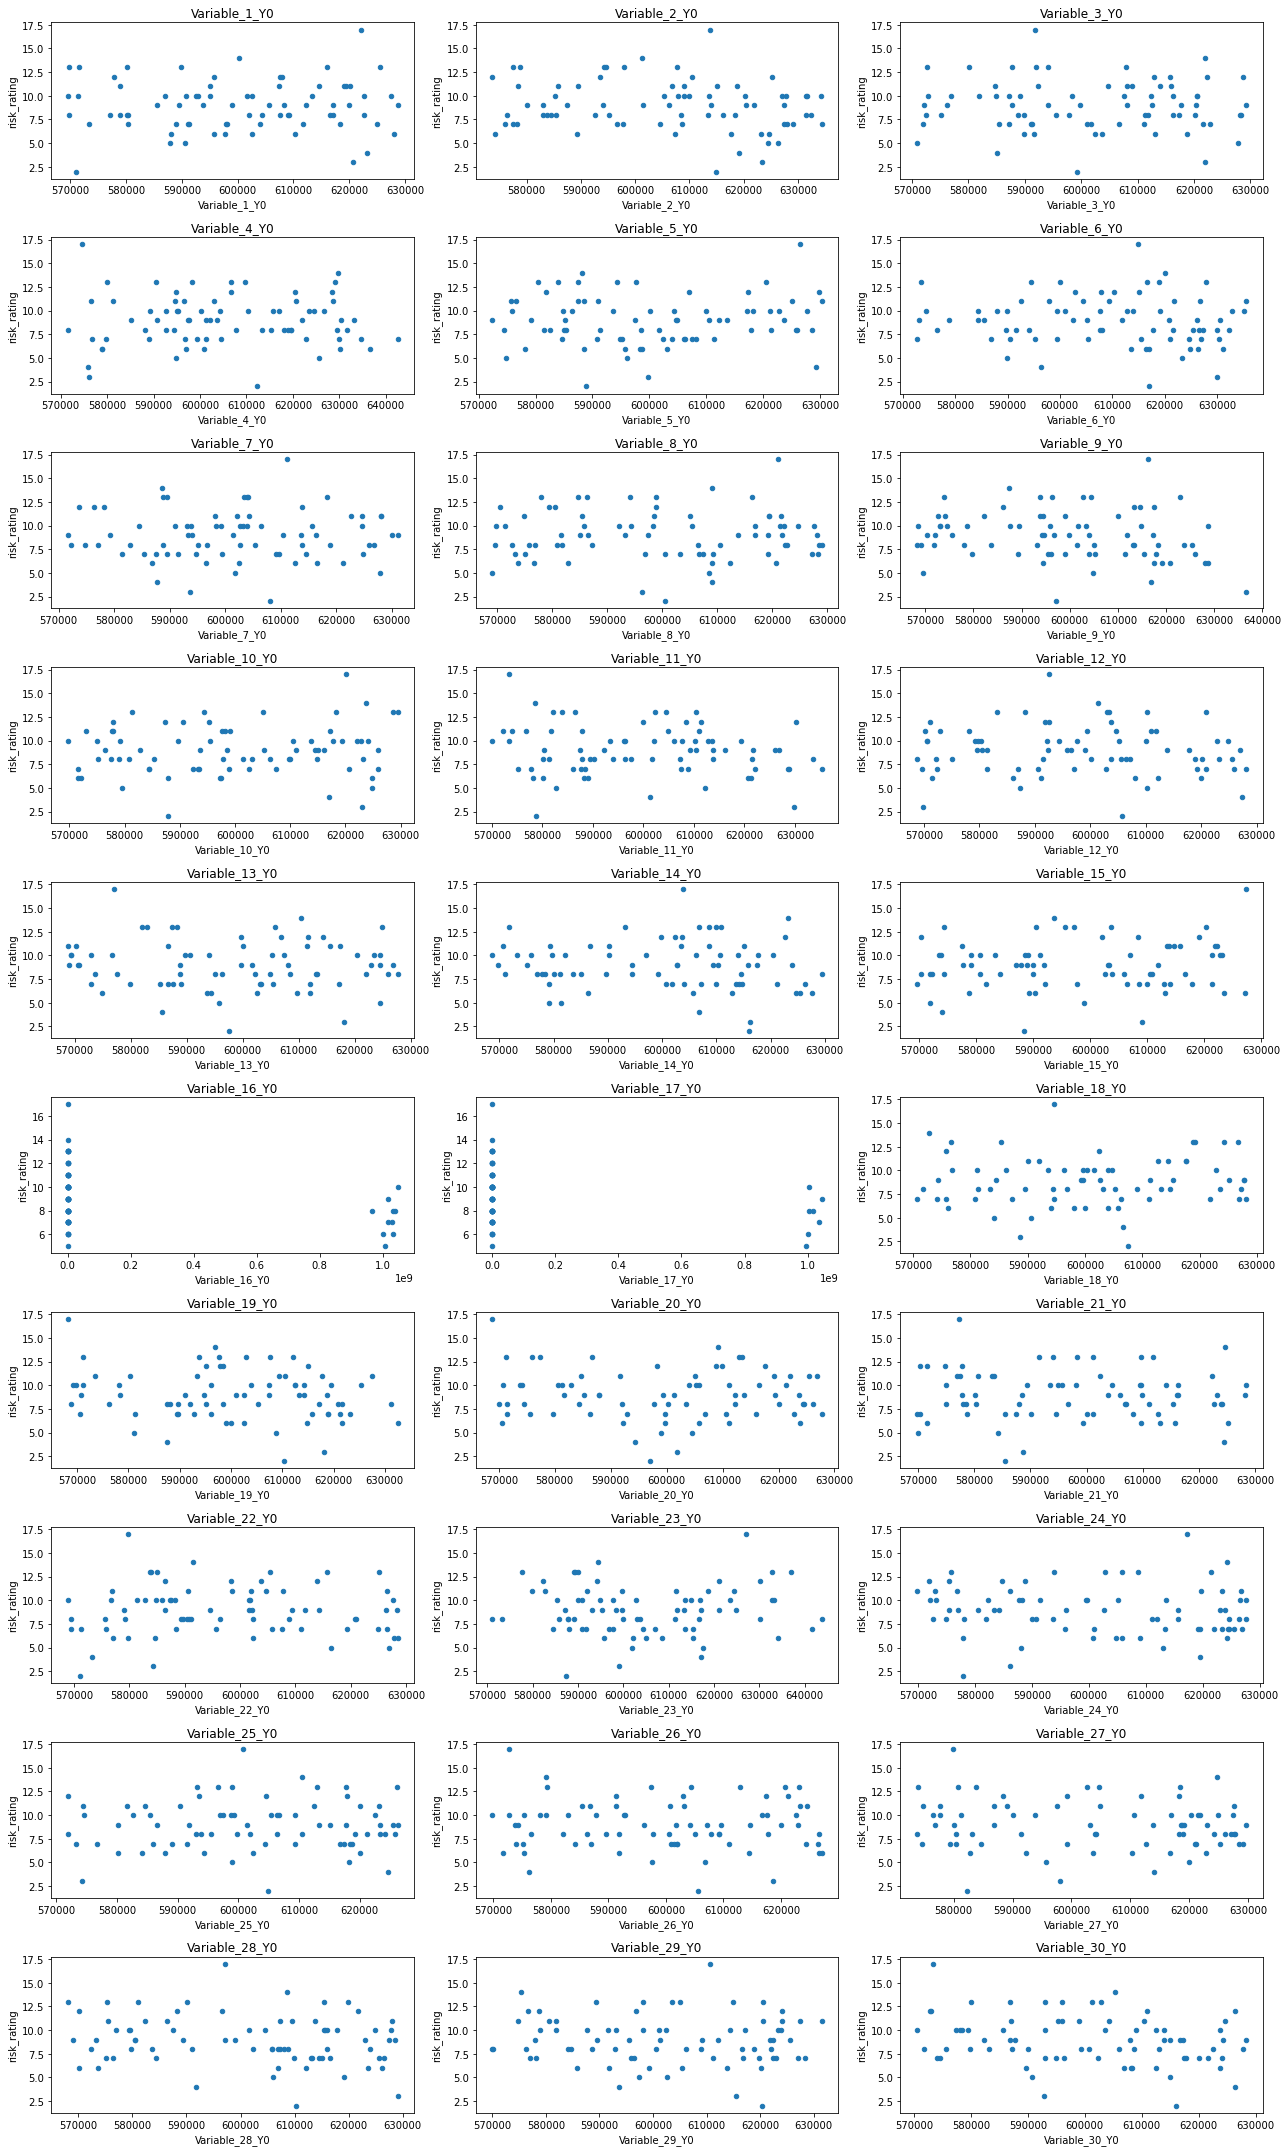

In [19]:
fig, ax = plt.subplots(10,3, figsize=(18,30))
i=0
j=0

for col in Y0_cols:
    multi_risk_clients.plot(kind='scatter', x=col, y='risk_rating', ax=ax[i,j], title=col)

    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
        
plt.tight_layout()

Chart above show the relation between Risk Rating and Y0 variables

Variables 16 and 17 show some promise

These also showed up in the Correlation Matrix as having relatively high correlation with Risk Rating compared to the other variables

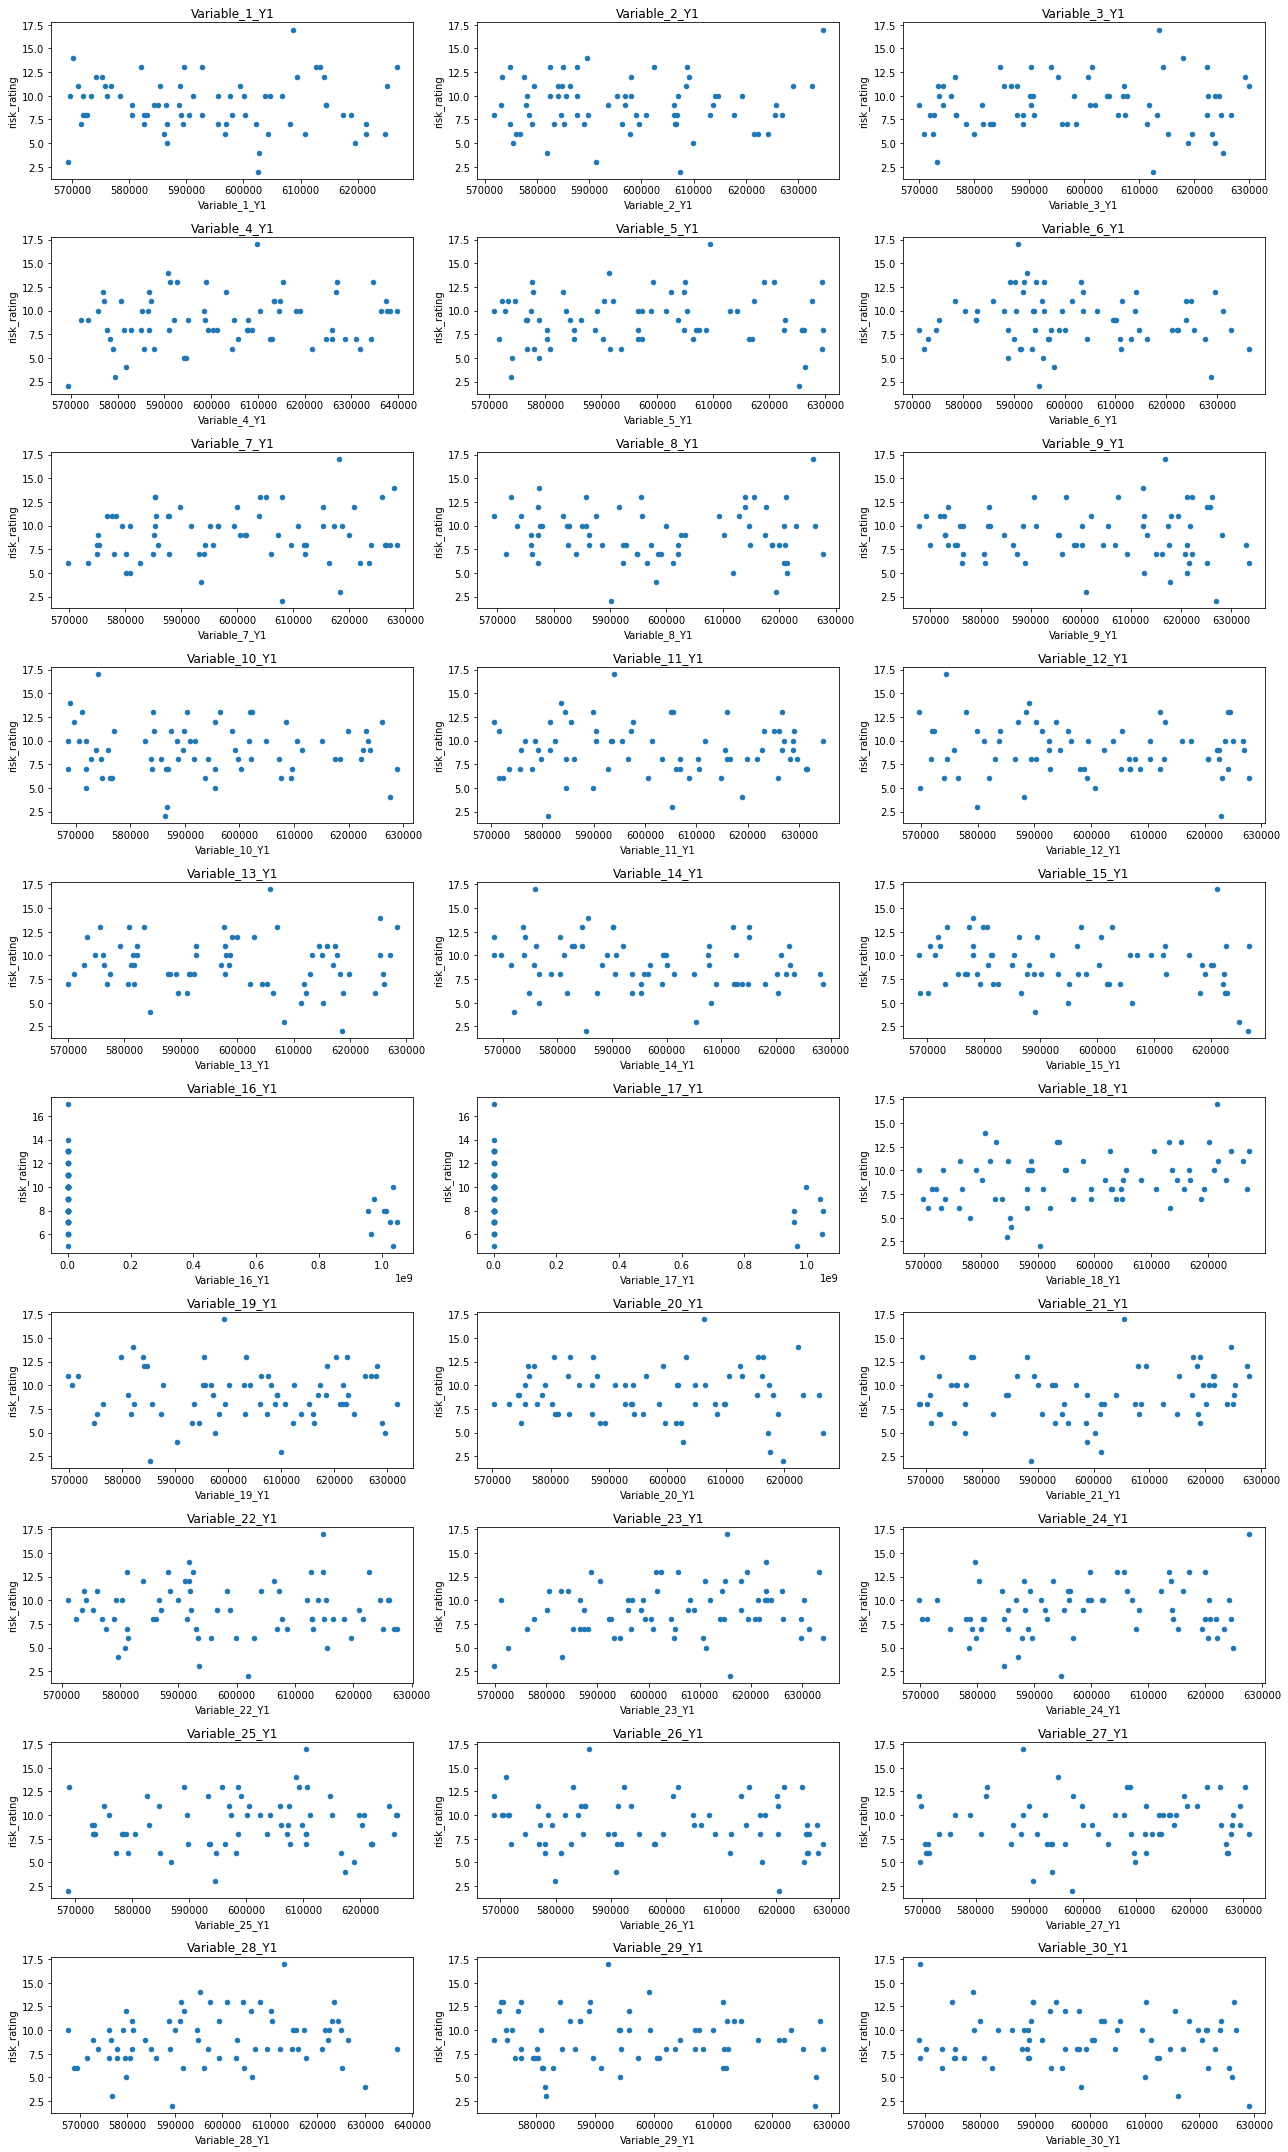

In [23]:
fig, ax = plt.subplots(10,3, figsize=(18,30))
i=0
j=0

for col in Y1_cols:
    multi_risk_clients.plot(kind='scatter', x=col, y='risk_rating', ax=ax[i,j], title=col)

    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
        
plt.tight_layout()

Chart above show the relation between Risk Rating and Y1 variables

Variables 16 and 17 show some promise similar to in the chart with Y0 variables